Importing necessary libraries and the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

Looking at the first ten rows of the dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("test_scores.csv")
df.shape

(2133, 11)

In [3]:
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
5,ANKYI,Urban,Non-public,6OL,Standard,20.0,7YZO8,Female,Does not qualify,66.0,74.0
6,ANKYI,Urban,Non-public,6OL,Standard,20.0,9KMZD,Male,Does not qualify,63.0,75.0
7,ANKYI,Urban,Non-public,6OL,Standard,20.0,9USQK,Female,Does not qualify,63.0,72.0
8,ANKYI,Urban,Non-public,6OL,Standard,20.0,CS5QP,Male,Does not qualify,64.0,77.0
9,ANKYI,Urban,Non-public,6OL,Standard,20.0,D6HT8,Female,Does not qualify,61.0,72.0


Looking at the descriptive statistics of each numeric column, the data types in our dataset and correlation
The data type conversions will depend on the problem we aim to solve here

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
correlation=df.corr()
correlation

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


Data Visualization

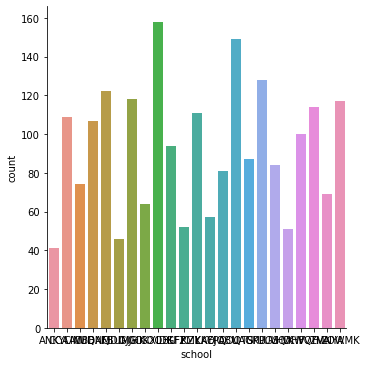

In [6]:
sns.catplot(x="school",data=df,kind="count")
plt.show()

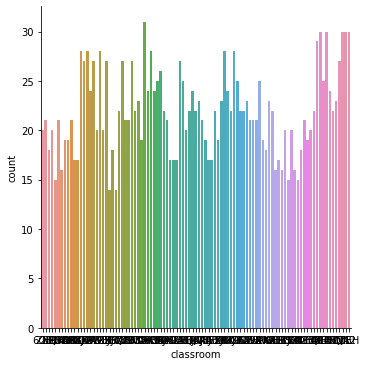

In [7]:
sns.catplot(x="classroom",data=df,kind="count")
plt.show()

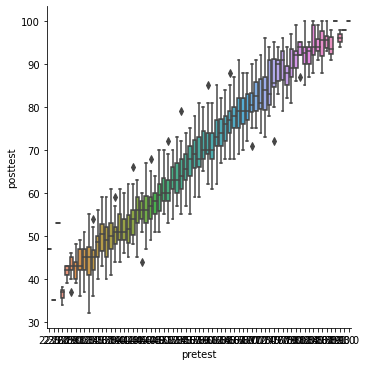

In [8]:
sns.catplot(x="pretest",y="posttest",data=df,kind="box")
plt.show()

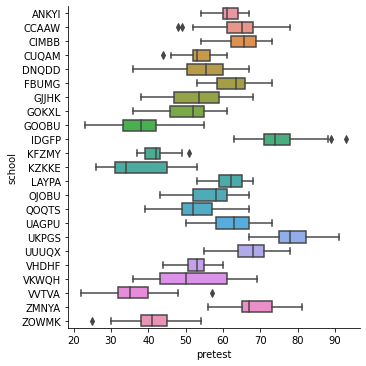

In [9]:
sns.catplot(x="pretest",y="school",data=df,kind="box")
plt.show()

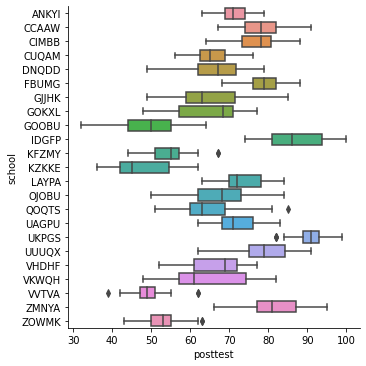

In [10]:
sns.catplot(x="posttest",y="school",data=df,kind="box")
plt.show()

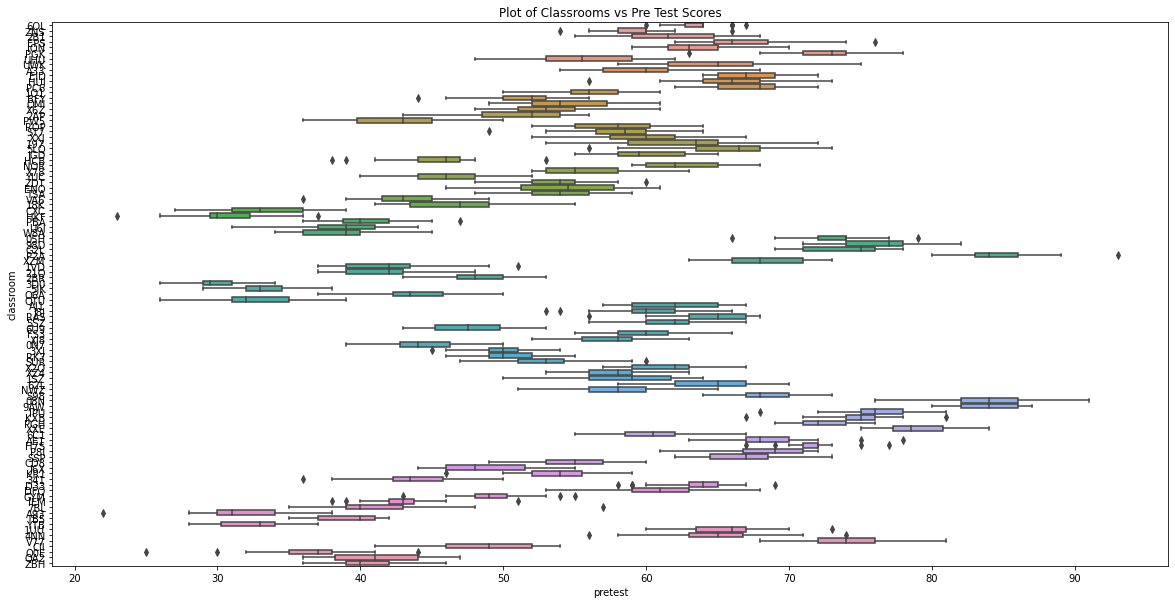

In [11]:
plt.figure(figsize=(20,10))
plt.title('Plot of Classrooms vs Pre Test Scores')
sns.boxplot(data=df, x='pretest', y='classroom');

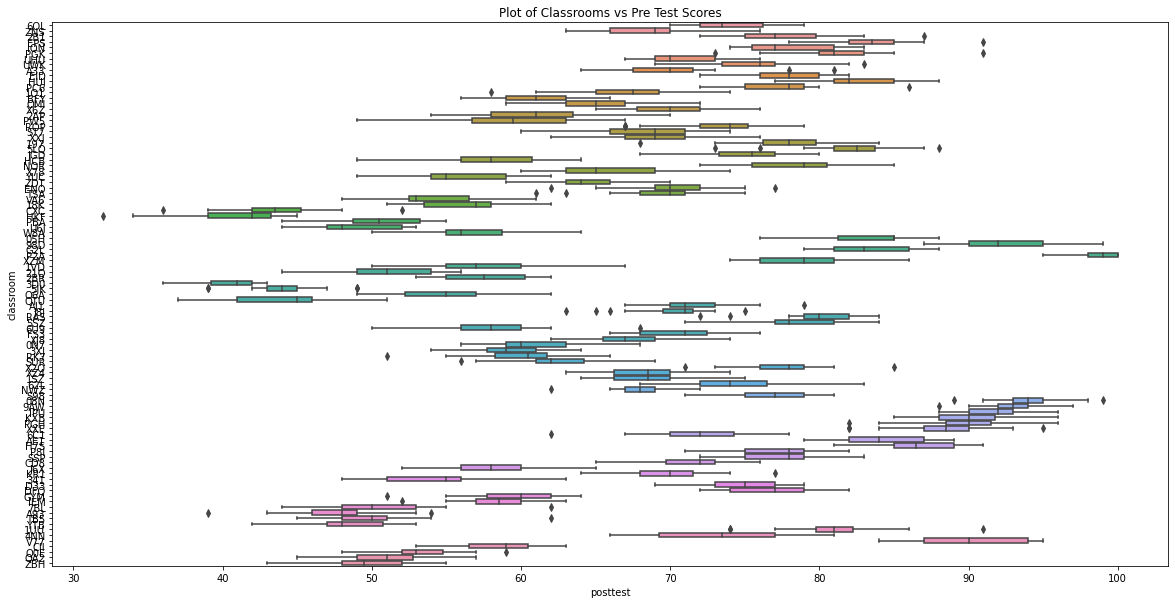

In [12]:
plt.figure(figsize=(20,10))
plt.title('Plot of Classrooms vs Pre Test Scores')
sns.boxplot(data=df, x='posttest', y='classroom');

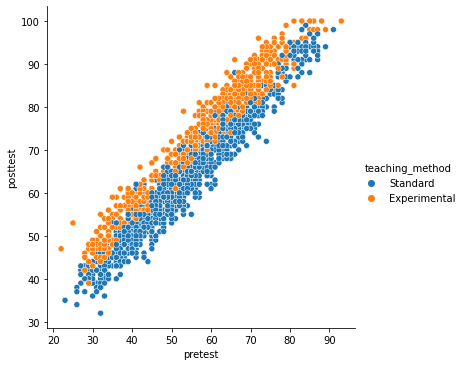

In [13]:
sns.relplot(x="pretest",y="posttest",data=df,kind="scatter",hue="teaching_method")
plt.show()

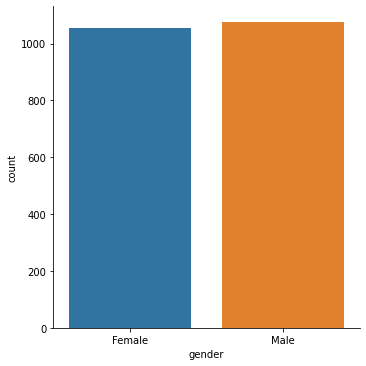

In [14]:
sns.catplot(x="gender",data=df,kind="count")
plt.show()

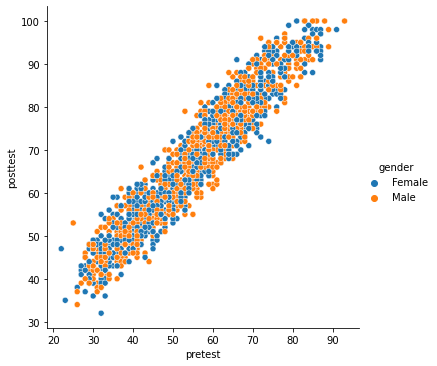

In [15]:
sns.relplot(x="pretest",y="posttest",data=df,kind="scatter",hue="gender")
plt.show()

Data Cleaning

In [16]:
df = df.drop('student_id', axis=1)

Preprocessing

I want to predict the tip from other columns, therefore, I have to scale the numerical columns and encode categorical columns. For binary ones, you have to either use label encoding or one hot encode them, then drop duplicate ones.

In [17]:
columns_to_encode = ["gender","lunch","teaching_method","school_type"]
columns_to_scale = ["n_student","pretest","posttest"]

There are two unique values in gender, lunch, teaching_method and school_type columns and thera are more than two unique  values in school,school_setting and classroom columns, so we have to encode  gender, lunch, teaching_method and school_type with label encoder and encode school,school_setting and classroom with one hot encoder.

I'm going to encode the school,school_setting and classroom columns with pandas' get_dummies method then directly append it to the main dataframe with pd.concat.

In [18]:
df = pd.concat([df, pd.get_dummies(df["school"],prefix="school")], axis=1)
df = pd.concat([df, pd.get_dummies(df["school_setting"],prefix="school_setting")], axis=1)
df = pd.concat([df, pd.get_dummies(df["classroom"],prefix="classroom")], axis=1)

I will import Label Encoder from sklearn, instantiate it, and fit and transform the columns that I want to label, then convert the output array into dataframe and insert it to the original one.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"]=pd.DataFrame(le.fit_transform(df["gender"]))
df["lunch"]=pd.DataFrame(le.fit_transform(df["lunch"]))
df["teaching_method"]=pd.DataFrame(le.fit_transform(df["teaching_method"]))
df["school_type"]=pd.DataFrame(le.fit_transform(df["school_type"]))

Now I will import MinMaxScaler to normalize the numerical columns, and put them in another dataframe called scaled_columns, then drop the original columns and append them to the original dataframe.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]),columns=columns_to_scale)
scaled_columns.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,0.517443,0.464168,0.516209
std,0.248758,0.191030,0.205688
min,0.000000,0.000000,0.000000
25%,0.352941,0.309859,0.352941
50%,0.470588,0.478873,0.529412
75%,0.764706,0.605634,0.661765
max,1.000000,1.000000,1.000000


Let's see the last version of the dataframe. Everything should be numeric.

In [21]:
df.drop(["n_student","pretest","posttest", "school", "school_setting", "classroom"],axis=1,inplace=True)
df = pd.concat([df, scaled_columns], axis=1)

In [22]:
df.head()

,school_type,teaching_method,gender,lunch,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,...,classroom_XZ4,classroom_XZM,classroom_YTB,classroom_YUC,classroom_ZBH,classroom_ZDT,classroom_ZNS,n_student,pretest,posttest
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.352941,0.563380,0.588235
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.352941,0.619718,0.691176
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.352941,0.591549,0.647059
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.352941,0.549296,0.661765
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.352941,0.591549,0.647059


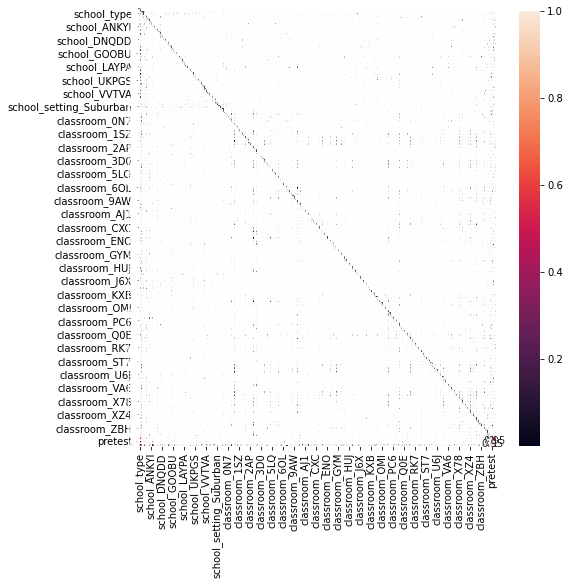

In [23]:
correlation = df.corr().abs()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()

Preparing data for regression

In [24]:
y = df.posttest
X = df.loc[:,df.columns!="posttest"]

In [25]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k=5)
k_best_features = kbest.fit_transform(X, y)
list(df.columns[kbest.get_support (indices=True)])

['lunch', 'school_UKPGS', 'classroom_P2A', 'n_student', 'pretest']

Train test split

And then I'll use basic support vector regressor to predict the posttest.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
pred = linearreg.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(pred, y_test))
print(mean_absolute_error(pred, y_test))

0.953137604222257
0.034102735612687694


In [29]:
from sklearn.linear_model import Ridge
linearrid = Ridge()
linearrid.fit(X_train, y_train)
predrid = linearrid.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(linearrid, X, y, cv=10).mean()

0.7000655207751283

In [47]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(linearrid, X, y, cv=10)
print("scores:\n{}".format(scores))
print("average score:\n{}".format(scores.mean()))

scores:
[0.44064437 0.3164074  0.68849216 0.66971153 0.86839349 0.71806398
 0.76987492 0.87708772 0.77501219 0.87696746]
average score:
0.7000655207751283


In [48]:
from sklearn.neighbors import KNeighborsRegressor
KN = KNeighborsRegressor()
KN.fit(X_train, y_train)
predKN = KN.predict(X_test)

In [49]:
Xx = df.loc[:,df.columns!="gender"]
Y = df.gender
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_neighbors":[1, 2, 5, 10, 20], "weights":["uniform","distance"]}]
grid_search = GridSearchCV(KN, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, Y)
grid_search.best_params_

c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_scorer.py", line 243, in _score
    **self._kwargs)
  File "c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users\user202\appdata\local\programs\python\pyth

{'n_neighbors': 1, 'weights': 'uniform'}

In [39]:
grid_search.best_score_

0.9925211706375323

In [56]:
predcv = grid_search.best_estimator_.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00       216

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

